In [15]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [16]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

In [17]:
# Get data into a table
mars_table = pd.read_html(url)
mars_table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [18]:

# Put table into a DataFrame
mars_df = mars_table[0]
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [19]:
# Check data types
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [20]:
# Convert date to datetime64
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])

In [21]:
#How many months exist on Mars?
len(mars_df["month"].unique())

12

In [22]:
#How many Martian (and not Earth) days worth of data exist in the scraped 
#dataset?
len(mars_df["sol"].unique())

1867

In [24]:
#What are the coldest and the warmest months on Mars 
#(at the location of Curiosity)?
temps = mars_df.groupby(by=['month'])['min_temp'].mean()
temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<AxesSubplot:xlabel='month'>

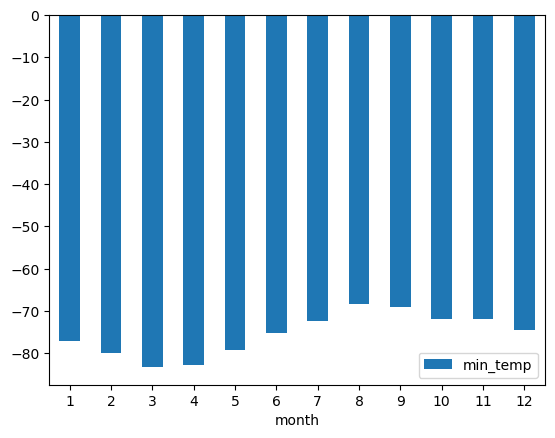

In [25]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)?
temps_df = pd.DataFrame(temps)
temp_chart = temps_df.plot.bar(rot=0)
temp_chart

<AxesSubplot:xlabel='month'>

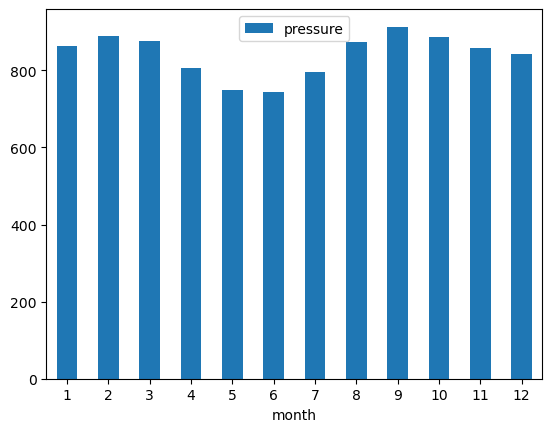

In [27]:
#Which months have the lowest and the highest atmospheric pressure on Mars? 
pressure = mars_df.groupby(by=['month'])["pressure"].mean()
pressure_df = pd.DataFrame(pressure)
pressure_chart = pressure_df.plot.bar(rot=0)
pressure_chart

In [28]:
# How many terrestrial (Earth) days exist in a Martian year? 
days_df = mars_df.groupby('terrestrial_date')['min_temp'].mean()
days_df


terrestrial_date
2012-08-16   -75.0
2012-08-17   -76.0
2012-08-18   -76.0
2012-08-19   -74.0
2012-08-20   -74.0
              ... 
2018-02-23   -78.0
2018-02-24   -77.0
2018-02-25   -76.0
2018-02-26   -77.0
2018-02-27   -77.0
Name: min_temp, Length: 1867, dtype: float64

In [30]:
#Export the DataFrame to a CSV file.
mars_df.to_csv("WeatherData.csv", index = False)

(array([15340., 15706., 16071., 16436., 16801., 17167., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

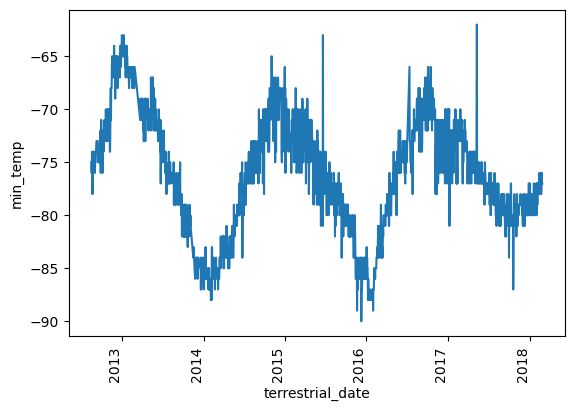

In [31]:
days_df.plot(kind="line")

plt.ylabel("min_temp")
plt.xlabel("terrestrial_date")
plt.xticks(rotation='vertical')